In [ ]:
#mkdir A4prac

In [ ]:
cd A4prac

/content/A4prac


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer #converts raw documents to a matrix form
                                                            #also used for finding the frequency of a word in whole document
import seaborn as sns #data visualization
from sklearn.model_selection import train_test_split

#Algorithms used for Classification Purpose---> GaussianNB, Logistic, RandomForest
from sklearn.naive_bayes import GaussianNB #special algorithm used when the data having normal distribution
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#for Evaluation Purpose
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#for Hypertuning functioning
from sklearn.model_selection import GridSearchCV # used for finding optimal value for a given parameter in a grid 
from sklearn.metrics import accuracy_score

df = pd.read_csv('SMSSpamCollection', sep='\t', names=['Label','Text'])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
sent = 'Hello friends How are you?' #sample text

In [ ]:
import nltk #natural language toolkit used for dealing with text data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#for tokenization
from nltk.tokenize import word_tokenize #creates list of words from given sentence
word_tokenize(sent)

['Hello', 'friends', 'How', 'are', 'you', '?']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#for removing stopwords
from nltk.corpus import stopwords
swords = stopwords.words('english')
swords

In [ ]:
clean = [word for word in word_tokenize(sent) if word not in swords]
clean

['Hello', 'friends', 'How', '?']

In [ ]:
#for removing stemming
from nltk.stem import PorterStemmer   #removes stem words like es, s, ed and so on
ps = PorterStemmer() #create object of porterstemmer
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]
clean

['hello', 'friend', 'how', '?']

In [ ]:
#function built for cleaning of text(tokenization + stemming + stopwords)
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [word for word in tokens 
           if word.isdigit() or word.isalpha()]
  clean = [ps.stem(word) for word in clean #stemming
           if word not in swords]
  return clean

In [ ]:
clean_text(sent)

['hello', 'friend', 'how']

In [ ]:
tfidf = TfidfVectorizer(analyzer=clean_text) #create object of tfidfvectorizer, analyzer takes clean words
                                              #or function returns clean words

In [ ]:
x = df['Text'] #input
y = df['Label'] #output

In [ ]:
x_new = tfidf.fit_transform(x) #converting our text raw data into clean data using tfidf 

In [ ]:
x_new.shape

(5572, 6513)

In [ ]:
tfidf.get_feature_names() #prints the feature names of clean data

In [ ]:
y.value_counts() #retruns a series of values which are distinguished into classes

ham     4825
spam     747
Name: Label, dtype: int64

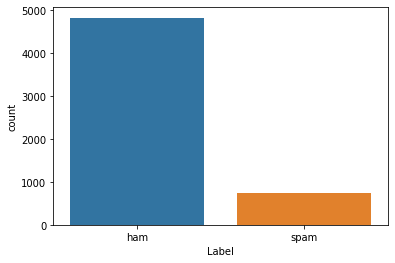

In [ ]:
sns.countplot(x=y) #prints a bar graph for input output categorical data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25) #splitting our dataset

In [ ]:
#1st classification algorithm. 
#Steps-----> create object, train it, make predictions, evaluate it

nb = GaussianNB() #object creation 
nb.fit(x_train.toarray(), y_train) #train the model

GaussianNB()

In [ ]:
y_pred = nb.predict(x_test.toarray()) #predicting the values by the model for input test data
y_pred.shape

(1393,)

In [ ]:
y_test.value_counts()

ham     1208
spam     185
Name: Label, dtype: int64

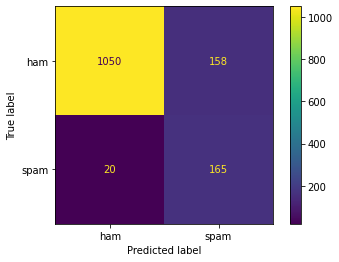

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) #evaluating the model

In [ ]:
print(classification_report(y_test, y_pred)) #Evaluation based on accuracy, precision, recall and f1 score

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [ ]:
rf = RandomForestClassifier(random_state = 0) #2nd Algorithm for Classification
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
ypred1 = rf.predict(x_test)
ypred1.shape

(1393,)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



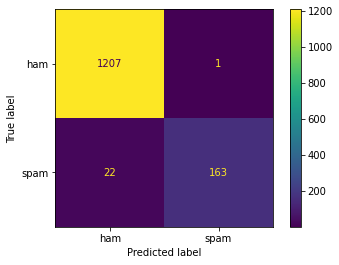

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test, ypred1))
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.84       185

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393



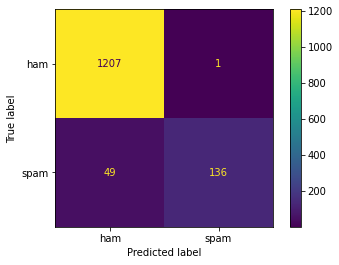

In [ ]:
log = LogisticRegression() #3rd Algorithm for Classification
log.fit(x_train,y_train)
ypred2 = log.predict(x_test)

print(ConfusionMatrixDisplay.from_predictions(y_test, ypred2))
print(classification_report(y_test, ypred2))

In [ ]:
#Performing hyper parameter tuning
#below is the grid or list of parameters for any ML model
params = {
    'criterion': ['gini','entropy'],
    'max_features': ['sqrt','log2'],
    'random_state': [0,1,2,3,4],
    'class_weight': ['balanced', ' balanced_subsample']
}
grid = GridSearchCV(rf, param_grid = params, cv = 5, scoring = 'accuracy') #gives optimal value for grid of parameters, rf = RandomForestAlgo.

In [ ]:
grid.fit(x_train, y_train) #train the model

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 762, in _validate_y_class_weight
    % self.class_weight
ValueError: Valid 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', ' balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=1)

In [ ]:
rf = grid.best_estimator_
ypred3 = rf.predict(x_test)
accuracy_score(ypred3, y_test)

0.9813352476669059